In [3]:
import pandas as pd

In [4]:
# warning! .. running this too many times costs money
#! ./geocode.py -i newseqf.csv -o newseqfgeo -A country

In [5]:
geof=pd.read_csv('finalseq.csv')
geof

,country,id,subtype,date,ha_accession,ha_sequence,na_accession,na_sequence,ha_risk,na_risk,...,formatted_address,latitude,longitude,accuracy,google_place_id,type,postcode,input_string,number_of_results,status
0,AK,A/gull/AK/21MB00111/2021,H16N3,2021-08-01,EPI2311583,MTVKLLYLLMIVLGRYSKADKICIGYLSNNSTDKVDTLTENGVPVT...,EPI2311582,MSPNQRIIAIGSVNTILSAIALLIGIGNLAFNAVIHGKVETGNGGI...,0.007051,0.004280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK,0,ZERO_RESULTS
1,Aichi,A/chicken/Aichi/22A3T/2022,H5N1,2022-12-05,EPI2747722,MENIVLLLATVSLVKSDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...,EPI2747721,MNPNQRIITTGSICMVIGIVSLMLQIGNIISIWVSHSIQTGNQHQP...,0.005260,0.000405,...,"Aichi, Japan",35.018251,137.292389,APPROXIMATE,ChIJ5zKTSdW6BGARp0EVGF2mX-s,"administrative_area_level_1,political",NaN,Aichi,1,OK
2,Akita,A/whooper_swan/Akita/0511B002/2022,H5N1,2022-11-23,EPI2279750,MENIVLLLATVSLVKSDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...,EPI2279751,MNPNQRIITTGSICMVIGIVSLMLQIGNIISIWVNHSIQTGNQHQP...,0.005260,0.001365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akita,0,ZERO_RESULTS
3,Alaska,A/northern_pintail/Alaska/USGS-0335/2022,H5N1,2022-09-14,EPI2909469,MENIVLLLAIISLVKSDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...,EPI2909467,MNPNQRIITTGSICMVIGIVSLMLQIGNIISIWVSHSIQTGNQYQP...,0.005253,0.000153,...,"Alaska, USA",63.588753,-154.493062,APPROXIMATE,ChIJG8CuwJzfAFQRNduKqSde27w,"administrative_area_level_1,political",NaN,Alaska,1,OK
4,Alaska,A/red_fox/Alaska/22-016300-001-original/2022,H5N1,2022-05-10,EPI2473508,MENIVLLLAIISLVESDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...,EPI2473505,MNPNQRIITTGSICMVIGIVSLMLQIGNIISIWVSHSIQTGNQYQP...,0.005260,0.000153,...,"Alaska, USA",63.588753,-154.493062,APPROXIMATE,ChIJG8CuwJzfAFQRNduKqSde27w,"administrative_area_level_1,political",NaN,Alaska,1,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6368,Zhejiang,A/chicken/Zhejiang/S1102/2020(H10N3),H10N3,2020-05-07,EPI2213793,MYKIVVIIAFLGTVKALDKICLGHHAVANGTIVKTLTNEQEEVTNA...,EPI2213792,MNPNQKIITLGVVNTTLSTLALLIGIGNQIFNTVIHEKVGVHQTVV...,0.078976,0.005092,...,"Zhejiang, China",30.265550,120.153600,APPROXIMATE,ChIJv8wKpTQSSTQRt3wYNsVx74E,"administrative_area_level_1,political",NaN,Zhejiang,1,OK
6369,Zhejiang,A/chicken/Zhejiang/S1172/2021(H10N3),H10N3,2021-05-08,EPI2213801,MYKTVVIIAFLGTVKALDKICLGHHAVANGTIVKTLTNEQEEVTNA...,EPI2213800,MNPNQKIITLGVVNTTLSTLALLIGIGNQIFNIIIHEKVGVHQTVV...,0.078976,0.005092,...,"Zhejiang, China",30.265550,120.153600,APPROXIMATE,ChIJv8wKpTQSSTQRt3wYNsVx74E,"administrative_area_level_1,political",NaN,Zhejiang,1,OK
6370,Zhejiang,A/chicken/Zhejiang/ZJ79/2021,H10N3,2021-04-03,EPI1884758,MYKIVVIIAFLGTVKALDKICLGHHAVANGTIVKTLTNEQEEVTNA...,EPI1884760,MNPNQKIITLGVVNTTLSTLALLIGIGNQIFNIVIHEKVGVHQTVV...,0.079099,0.005092,...,"Zhejiang, China",30.265550,120.153600,APPROXIMATE,ChIJv8wKpTQSSTQRt3wYNsVx74E,"administrative_area_level_1,political",NaN,Zhejiang,1,OK
6371,Zhejiang,A/chicken/Zhejiang/0132/2021,H10N3,2021-05-08,EPI1884798,MYKIVVIIAFLGTVKALDKICLGHHAVANGTIVKTLTNEQEEVTNA...,EPI1884800,MNPNQKIITLGVVNTTLSTLALLIGIGNQIFNTVIHEKVGVHQTVV...,0.079262,0.005092,...,"Zhejiang, China",30.265550,120.153600,APPROXIMATE,ChIJv8wKpTQSSTQRt3wYNsVx74E,"administrative_area_level_1,political",NaN,Zhejiang,1,OK


In [6]:
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import contextily as ctx
import geopandas
import geoplot as gplt
import pylab as plt
import pandas as pd
import matplotlib.cm as cm
import matplotlib as mpl
import numpy as np
import json


In [7]:
geo_DF=geopandas.GeoDataFrame(
    geof, crs="EPSG:4326",geometry=geopandas.points_from_xy(geof.longitude, geof.latitude))
df=geo_DF.to_crs('epsg:4326')
df_=df.to_crs('epsg:4326')
df__ = df.to_crs(epsg=3857) # reproject it in Web mercator
geo_DF__ = geo_DF.to_crs(epsg=3857) # reproject it in Web mercator

In [ ]:
def getColor(x,cmap='jet',VMIN=.5,VMAX=1.0,alpha=None):
    if alpha is None:
        alpha=1
    else:
        alpha = (((x-VMIN)/(VMAX-VMIN)))
    if alpha == 1:
        alpha=.999
    norm = mpl.colors.Normalize(vmin=VMIN, vmax=VMAX)
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    ctup=np.array(list(m.to_rgba(x)))
    ctup[3]=alpha
    return tuple(ctup)

def getColor(x,cmap='jet',VMIN=.5,VMAX=1.0):
    norm = mpl.colors.Normalize(vmin=VMIN, vmax=VMAX)
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    return m.to_rgba(x)

def mssize(x):
    return ((3.5**(x-2))) + (x>6.76)*900 + 40
#        return ((4.5**(x-2))) + (x>6.5)*200
def mssize1(x):


In [ ]:
    
def plotRisk(df,ax,variable='IRATe',ALPHA=.2,COL=None,mssize=mssize,colR=1,colG=.3,colB=.3,colalpha=.2,
             cmap='jet',VMIN=0,VMAX=None,markersize=20,markeredgecolor='w'):
    #df=df.sort_values(variable,ascending=True)
    if VMAX is None:
        VMAX=1
        
   
    #MS = lambda x: ((4.5**(x-2))) 
    MS = lambda x: mssize1(x) 
    
    df.plot(
        ax=ax,
        markersize=markersize* MS(df[variable]),
        edgecolor=markeredgecolor,lw=.5,
        color=(colR,colG,colB,colalpha),#'k',#getColor(df[variable],cmap=cmap,VMIN=VMIN,VMAX=VMAX),
        #alpha=ALPHA
    )
    
    return ax    

def saveFIG(filename='tmp.pdf'):
    import pylab as plt
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
    plt.margins(0,0)
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig(filename,dpi=600, bbox_inches = 'tight',pad_inches = 0,transparent=True) 
    return

In [9]:
tf=geo_DF__[geo_DF__.id.isin(['A/swine/Indiana/A02524710/2020','A/swine/Missouri/A02524711/2020'])]
tf#.transpose()

,country,id,subtype,date,ha_accession,ha_sequence,na_accession,na_sequence,ha_risk,na_risk,...,latitude,longitude,accuracy,google_place_id,type,postcode,input_string,number_of_results,status,geometry
1791,Indiana,A/swine/Indiana/A02524710/2020,H3N2,2020-10-07,EPI1818137,MKTIIALSYILCLVFAQKIPGNDNGTATLCLGHHAVPNGTIVKTIT...,EPI1818138,MNPNQKIITIGSVSLTISTICFFMQIAILITTIALHFKQYEFNSPP...,0.00047,0.000267,...,40.551217,-85.602364,APPROXIMATE,ChIJHRv42bxQa4gRcuwyy84vEH4,"administrative_area_level_1,political",NaN,Indiana,1,OK,POINT (-9529211.605 4946369.870)
4262,Missouri,A/swine/Missouri/A02524711/2020,H1N1,2020-10-07,EPI1818121,MKAILVVMLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,EPI1818122,MNPNQKIITIGSICMTIGTANLILQIGNIISIWVSHSIQIGNQSQI...,0.00009,0.000010,...,37.964253,-91.831833,APPROXIMATE,ChIJfeMiSNXmwIcRcr1mBFnEW7U,"administrative_area_level_1,political",NaN,Missouri,1,OK,POINT (-10222672.933 4574377.177)


In [17]:
geo_DF__=geo_DF__.rename(columns={'IRATe':'emergence_risk'})

In [18]:
allriskystrains=pd.read_csv('../../../paper_data_v1/irat_qnet/results/animal_predictions/allriskystrains_collapsed.csv',index_col=0)
allriskystrains=allriskystrains[allriskystrains.emergence_risk>6]
nonrisky_geo_df=geo_DF__[geo_DF__.emergence_risk<6]

In [19]:
allriskystrains.columns

Index(['subtype', 'ha_accession', 'na_accession', 'impact_risk',
       'emergence_risk'],
      dtype='object')

In [20]:
riskystrains=[x for x in geo_DF__.id if x in allriskystrains.index.values]
risky_geo_df=geo_DF__.set_index('id').loc[riskystrains,:].reset_index()
pf=risky_geo_df.copy()
npf=nonrisky_geo_df.copy()

In [21]:
pf.emergence_risk.max(),pf.emergence_risk.min()

(7.732746385774188, 6.258642635047084)

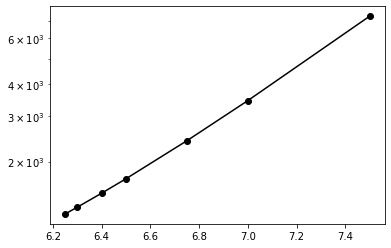

In [23]:
def mssize2(x):
    return ((5**(x-2))) + (x>6)*300 + 20

tx=[6.25,6.3,6.4,6.5,6.75,7,7.5]
sx=[mssize2(x) for x in tx]
plt.plot(tx,sx,'-ko')
plt.yscale('log')
sf=pd.concat([geo_DF__[geo_DF__.emergence_risk.between(6.15,6.3)].head(1),
geo_DF__[geo_DF__.emergence_risk.between(6.48,6.5)].head(1),
geo_DF__[geo_DF__.emergence_risk.between(6.6,6.9)].head(1),
geo_DF__[geo_DF__.emergence_risk.between(7,7.5)].head(1)])
sf=geo_DF__[geo_DF__.id.isin(sf.id.values)]

In [24]:
sf[['id','emergence_risk']]

,id,emergence_risk
1,A/chicken/Aichi/22A3T/2022,6.498476
3,A/northern_pintail/Alaska/USGS-0335/2022,6.808405
81,A/humboldt_penguin/Antofagasta/CEIRS-2360632/2023,7.404723
119,A/Chicken/Argentina/3346-1/2023,6.166525


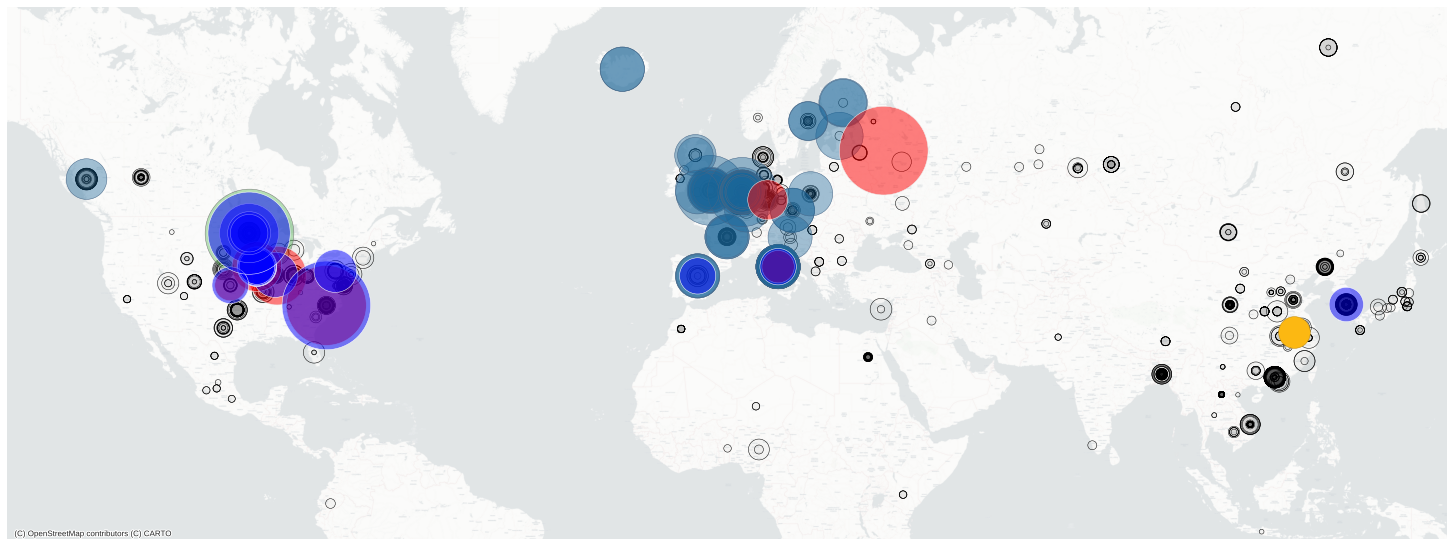

In [39]:
def plotRisk2(df,ax,variable='emergence_risk',ALPHA=.2,COL=None,mssize=mssize,colR=1,colG=.3,colB=.3,colalpha=.2,
             cmap='jet',VMIN=0,VMAX=None,markersize=20,markeredgecolor='w'):
    if VMAX is None:
        VMAX=1

    MS = lambda x: mssize2(x) 
    
    df.plot(
        ax=ax,
        markersize=markersize* MS(df[variable]),
        edgecolor=markeredgecolor,lw=.5,
        color=(colR,colG,colB,colalpha),#'k',#getColor(df[variable],cmap=cmap,VMIN=VMIN,VMAX=VMAX),
        #alpha=ALPHA
    )
    
    return ax    

cmap = cm.gist_rainbow
cmap = cm.gray
TVAR='emergence_risk'

fname1='./WB_Coastlines_10m/WB_Coastlines_10m.shp'
df1 = geopandas.read_file(fname1)
plt.style.use('dark_background')
plt.style.use('seaborn-whitegrid')
df1__ = df1.to_crs(epsg=3857) # reproject it in Web mercator
ax1 = df1__.plot(figsize=(20,20), alpha=.0, edgecolor='w')
VMIN=pf[TVAR].min()
VMAX=pf[TVAR].max()

ALPHA=1
MS=1.5*.5

plotRisk2(npf,ax=ax1,cmap=cmap,markersize=MS,ALPHA=ALPHA,mssize=mssize2,
         markeredgecolor=(0,0,0,1),variable=TVAR,VMIN=VMIN,colalpha=.025,colR=.1,colG=0.1,colB=.1,
         VMAX=VMAX)

plotRisk2(pf[pf.subtype=='H7N9'],ax=ax1,cmap=cmap,markersize=MS,ALPHA=ALPHA,mssize=mssize2,
         markeredgecolor='#777777',variable=TVAR,VMIN=VMIN,colalpha=.4,colR=0.3,colG=.7,colB=0.3,
         VMAX=VMAX)

plotRisk2(pf[pf.subtype=='H5N1'],ax=ax1,cmap=cmap,markersize=MS,ALPHA=ALPHA,mssize=mssize2,
         markeredgecolor='#446688',variable=TVAR,VMIN=VMIN,colalpha=.4,colR=0.1,colG=.4,colB=0.6,
         VMAX=VMAX)


plotRisk2(pf[pf.subtype=='H9N2'],ax=ax1,cmap=cmap,markersize=MS,ALPHA=ALPHA,mssize=mssize2,
         markeredgecolor='#BD890F',variable=TVAR,VMIN=VMIN,colalpha=1,colR=0.99,colG=.72,colB=0.07,
         VMAX=VMAX)

plotRisk2(pf[pf.subtype=='H1N1'],ax=ax1,cmap=cmap,markersize=MS,ALPHA=ALPHA,mssize=mssize2,
         markeredgecolor='#eeeeee',variable=TVAR,VMIN=VMIN,colalpha=.5,colR=1,colG=0,colB=0,
         VMAX=VMAX)

plotRisk2(pf[pf.subtype=='H3N2'],ax=ax1,cmap=cmap,markersize=MS,ALPHA=ALPHA,mssize=mssize2,
         markeredgecolor=(1,1,1,1),variable=TVAR,VMIN=VMIN,colalpha=.5,colR=0,colG=0,colB=1,
         VMAX=VMAX)
# plotRisk2(sf,ax=ax1,cmap=cmap,markersize=MS,ALPHA=ALPHA,mssize=mssize2,
#          markeredgecolor=(0,0,0,1),variable=TVAR,VMIN=VMIN,colalpha=.5,colR=0,colG=0,colB=1,
#          VMAX=VMAX)

#ctx.add_basemap(ax1,source=ctx.providers.Stamen.TonerLite,alpha=.5)
ctx.add_basemap(ax1,source=ctx.providers.CartoDB.Positron,alpha=.7,zoom=6)
#ctx.add_basemap(ax1,source=ctx.providers.Stamen.Toner)
#ctx.add_basemap(ax1,source=ctx.providers.Stamen.Watercolor,alpha=.5)
#ctx.add_basemap(ax1,source=ctx.providers.NASAGIBS.ViirsEarthAtNight2012,alpha=1)
#ax1.set_ylim(-.85e7,.985e7)
ax1.set_ylim(-.1e7,1.1e7)
ax1.set_xlim(-1.6e7,1.65e7)
ax1.set_axis_off()
saveFIG(filename='bionorad_upd.pdf')

In [46]:
sf[['country','emergence_risk']]

,country,emergence_risk
14,Indiana,6.713931
89,Texas,6.153081
533,Italy,5.984093
741,Minnesota,6.494293
2226,Minnesota,5.628898


In [47]:
pf.subtype.value_counts()

subtype
H1N1    64
H3N2    17
H9N2     2
H7N9     1
Name: count, dtype: int64

In [48]:
sf[['country','emergence_risk']]

,country,emergence_risk
14,Indiana,6.713931
89,Texas,6.153081
533,Italy,5.984093
741,Minnesota,6.494293
2226,Minnesota,5.628898


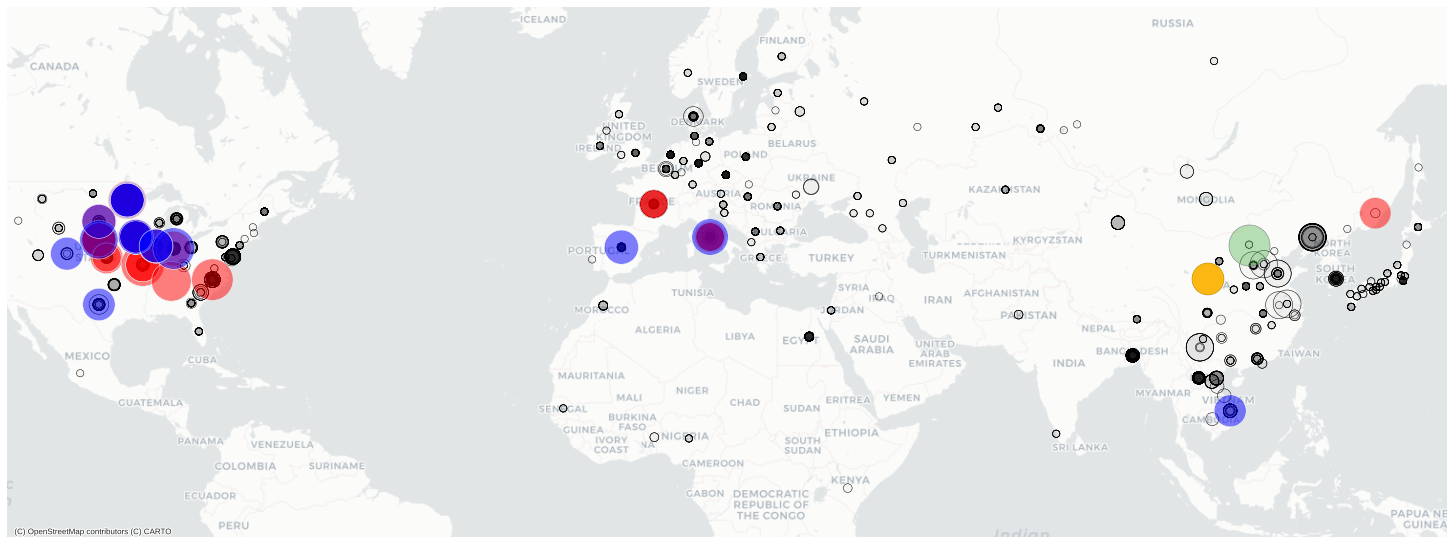

In [51]:
cmap = cm.gist_rainbow
cmap = cm.gray
TVAR='IRATi'

fname1='./WB_Coastlines_10m/WB_Coastlines_10m.shp'
df1 = geopandas.read_file(fname1)
plt.style.use('dark_background')
plt.style.use('seaborn-whitegrid')
df1__ = df1.to_crs(epsg=3857) # reproject it in Web mercator
ax1 = df1__.plot(figsize=(20,20), alpha=.0, edgecolor='w')
VMIN=pf[TVAR].min()
VMAX=pf[TVAR].max()

ALPHA=1
MS=1.5*.5

plotRisk2(npf,ax=ax1,cmap=cmap,markersize=MS,ALPHA=ALPHA,mssize=mssize2,
         markeredgecolor=(0,0,0,1),variable=TVAR,VMIN=VMIN,colalpha=.025,colR=.1,colG=0.1,colB=.1,
         VMAX=VMAX)

plotRisk2(pf[pf.subtype=='H7N9'],ax=ax1,cmap=cmap,markersize=MS,ALPHA=ALPHA,mssize=mssize2,
         markeredgecolor='#777777',variable=TVAR,VMIN=VMIN,colalpha=.4,colR=0.3,colG=.7,colB=0.3,
         VMAX=VMAX)


plotRisk2(pf[pf.subtype=='H9N2'],ax=ax1,cmap=cmap,markersize=MS,ALPHA=ALPHA,mssize=mssize2,
         markeredgecolor='#BD890F',variable=TVAR,VMIN=VMIN,colalpha=1,colR=0.99,colG=.72,colB=0.07,
         VMAX=VMAX)

plotRisk2(pf[pf.subtype=='H1N1'],ax=ax1,cmap=cmap,markersize=MS,ALPHA=ALPHA,mssize=mssize2,
         markeredgecolor='#eeeeee',variable=TVAR,VMIN=VMIN,colalpha=.5,colR=1,colG=0,colB=0,
         VMAX=VMAX)

plotRisk2(pf[pf.subtype=='H3N2'],ax=ax1,cmap=cmap,markersize=MS,ALPHA=ALPHA,mssize=mssize2,
         markeredgecolor=(1,1,1,1),variable=TVAR,VMIN=VMIN,colalpha=.5,colR=0,colG=0,colB=1,
         VMAX=VMAX)
# plotRisk2(sf,ax=ax1,cmap=cmap,markersize=MS,ALPHA=ALPHA,mssize=mssize2,
#          markeredgecolor=(0,0,0,1),variable=TVAR,VMIN=VMIN,colalpha=.5,colR=0,colG=0,colB=1,
#          VMAX=VMAX)

#ctx.add_basemap(ax1,source=ctx.providers.Stamen.TonerLite,alpha=.5)
ctx.add_basemap(ax1,source=ctx.providers.CartoDB.Positron,alpha=.7)
#ctx.add_basemap(ax1,source=ctx.providers.Stamen.Toner)
#ctx.add_basemap(ax1,source=ctx.providers.Stamen.Watercolor,alpha=.5)
#ctx.add_basemap(ax1,source=ctx.providers.NASAGIBS.ViirsEarthAtNight2012,alpha=1)
#ax1.set_ylim(-.85e7,.985e7)
ax1.set_ylim(-.1e7,.985e7)
ax1.set_xlim(-1.3e7,1.65e7)
ax1.set_axis_off()
saveFIG(filename='../../../tex/overleaf/Figures/bionorad_upd_impact.pdf')

In [49]:
pf.sort_values('IRATi',ascending=False)#[pf.subtype=='h7']

,id,subtype,ha_accession,na_accession,ha,na,ha_risk,na_risk,geometric_mean_risk,emergence_risk,...,formatted_address,latitude,longitude,accuracy,google_place_id,type,postcode,number_of_results,status,geometry
20,A/swine/Missouri/A02524711/2020,H1N1,EPI1818121,EPI1818122,MKAILVVMLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSICMTIGTANLILQIGNIISIWVSHSIQIGNQSQI...,"[0.007702821053332326, 0.00794167832708008, 0....","[0.0016000691389129699, 0.0019043683598783635,...","[0.0035107045233124007, 0.003888943420830784, ...",6.782248,...,"Missouri, USA",37.964253,-91.831833,APPROXIMATE,ChIJfeMiSNXmwIcRcr1mBFnEW7U,"administrative_area_level_1,political",NaN,1,OK,POINT (-10222672.933 4574377.177)
67,A/swine/Indiana/A02524710/2020,H3N2,EPI1818137,EPI1818138,MKTIIALSYILCLVFAQKIPGNDNGTATLCLGHHAVPNGTIVKTIT...,MNPNQKIITIGSVSLTISTICFFMQIAILITTIALHFKQYEFNSPP...,"[0.008423100311281287, 0.0044835948774065975, ...","[0.006596476585994605, 0.006619358238135353, 0...","[0.00745404480700585, 0.00544779961894918, 0.0...",6.729258,...,"Indiana, USA",40.267194,-86.134902,APPROXIMATE,ChIJHRv42bxQa4gRcuwyy84vEH4,"administrative_area_level_1,political",NaN,1,OK,POINT (-9588493.419 4904846.506)
18,A/swine/North_Carolina/A02479173/2020,H1N1,EPI1780425,EPI1780426,MKAILVVLLYAFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSICMTIGTANLILQIGNIISIWVSHSIQIGNQSQI...,"[0.024405562284539314, 0.024142343619534542, 0...","[0.0016000691389129699, 0.0019043683598783635,...","[0.00624904688967123, 0.006780554204661509, 0....",6.721477,...,"North Carolina, USA",35.759573,-79.019300,APPROXIMATE,ChIJgRo4_MQfVIgRGa4i6fUwP60,"administrative_area_level_1,political",NaN,1,OK,POINT (-8796388.205 4267589.232)
81,A/Camel/Inner_Mongolia/XL/2020,H7N9,EPI2026200,EPI2026202,MNTQILVFALIAIIPTNADKICLGHHAVSNGTKVNTLTEREVEVVN...,MNPNQKILCTSATAITIGAIAVLIGIANLGLNIGLHLKPGCNCSHS...,"[0.025061424930009856, 0.01711340116551936, 0....","[0.0011227960579890436, 0.0012230115569459082,...","[0.0053046082908169015, 0.004574919387714034, ...",6.704867,...,"Inner Mongolia, China",40.817330,111.765220,APPROXIMATE,ChIJ3xRp0kvMBTYRUOnCbYFGl9U,"administrative_area_level_1,political",NaN,1,OK,POINT (12441647.379 4985435.088)
61,A/swine/Tennessee/A02524414/2022,H1N1,EPI2149257,EPI2149258,MKAILLVLLHTLATANADTICIGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSICMTIGTANLILQIGNIISIWVSHSIQIGNQSQI...,"[0.035467992612923084, 0.035725739256979396, 0...","[0.002576033006553681, 0.0028761992336396513, ...","[0.00955859402041388, 0.010136781731503059, 0....",6.649429,...,"Tennessee, USA",35.517491,-86.580447,APPROXIMATE,ChIJA8-XniNLYYgRVpGBpcEgPgM,"administrative_area_level_1,political",NaN,1,OK,POINT (-9638091.306 4234430.426)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,A/swine/Italy/141142/2020,H1N1,EPI2142223,EPI2142148,MKARLFVLFCALNSLKADTICVGYHANNSTDTVDTILEKNVTVTHS...,MNPNQKIIIISSICMTNGIASLILQIGNIISIWISHSIQTGSQNQT...,"[0.04433547280814, 0.04450814264399003, 0.0442...","[0.031842596396384246, 0.03153112512925435, 0....","[0.037573349154320416, 0.03746187148259349, 0....",6.084359,...,Italy,41.871940,12.567380,APPROXIMATE,ChIJA9KNRIL-1BIRb15jJFz1LOI,"country,political",NaN,1,OK,POINT (1398994.342 5141815.938)
50,A/swine/Kansas/A02248208/2021,H1N1,EPI1932960,EPI1932961,MKIKLLILICTFTATYADTICIGYHANNSTDTVDTVLEKNVTVTHS...,MNTNQRIITIGTVCLIVGIVSLLLQIGNIVSLWISHSIQTGEKNHS...,"[0.045707395579165595, 0.04598286525410159, 0....","[0.03112630534787208, 0.030896916262003648, 0....","[0.037718726800530886, 0.03769255546182792, 0....",6.081841,...,"Kansas, USA",39.011902,-98.484246,APPROXIMATE,ChIJawF8cXEXo4cRXwk-S6m0wmg,"administrative_area_level_1,political",NaN,1,OK,POINT (-10963216.172 4723376.575)
52,A/swine/France/28-200396/2020,H1N1,EPI1975673,EPI1975677,MEAKLFVLFCTFTALKADTICVGYHANNSTDTVDTILEKNVTVTHS...,MNPNQKIITISSICMINGVASLILQIGNIISIWISHSIQTGNQNQT...,"[0.05104886704380452, 0.05142116390823026, 0.0...","[0.030593927776333775, 0.030255908710546994, 0...","[0.03951943004905082, 0.03944

In [50]:
pf1.sort_values('xscore').xscore

NameError: name 'pf1' is not defined

KeyError: 'xscore'

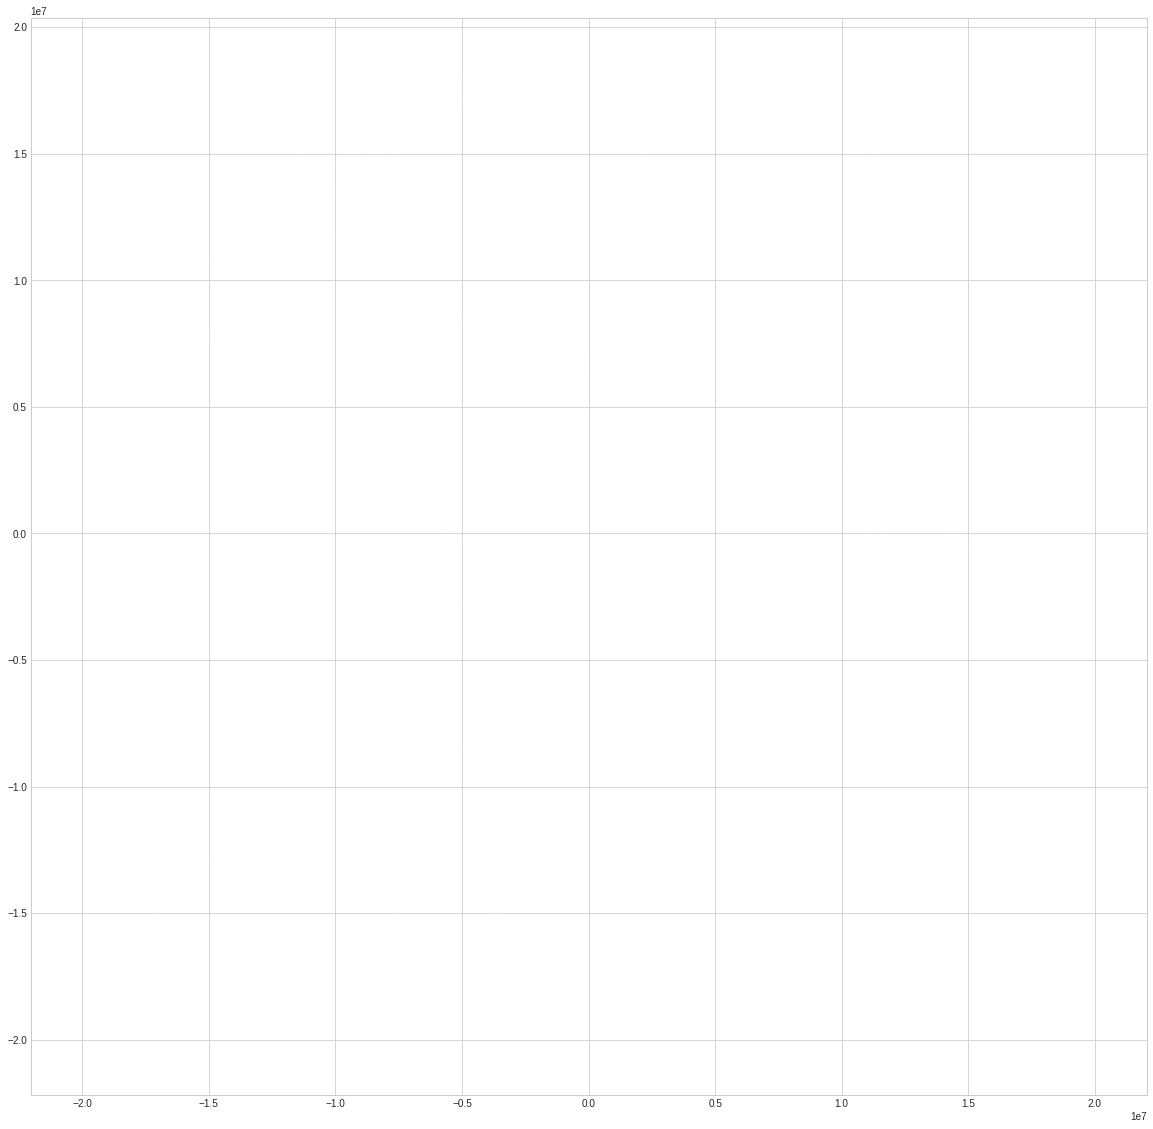

In [27]:
cmap = cm.gist_rainbow
cmap = cm.gray
TVAR='xscore'

fname1='./WB_Coastlines_10m/WB_Coastlines_10m.shp'
df1 = geopandas.read_file(fname1)
plt.style.use('dark_background')
plt.style.use('seaborn-whitegrid')
df1__ = df1.to_crs(epsg=3857) # reproject it in Web mercator
ax1 = df1__.plot(figsize=(20,20), alpha=.05, edgecolor='w')
VMIN=pf[TVAR].min()
VMAX=pf[TVAR].max()

ALPHA=1
#A/Chicken/Hebei/1011/2021	
plotRisk(pf[pf.id=='A/swine/Missouri/A02524711/2020'],ax=ax1,cmap=cmap,markersize=1.5,ALPHA=ALPHA,mssize=mssize1,
         markeredgecolor='#777777',variable=TVAR,VMIN=VMIN,colalpha=.4,colR=0.3,colG=.7,colB=0.3,
         VMAX=VMAX)



#ctx.add_basemap(ax1,source=ctx.providers.Stamen.TonerLite,alpha=1)
ctx.add_basemap(ax1,source=ctx.providers.CartoDB.Positron,alpha=1)
#ctx.add_basemap(ax1,source=ctx.providers.Stamen.Toner)
#ctx.add_basemap(ax1,source=ctx.providers.Stamen.Watercolor,alpha=.5)
#ctx.add_basemap(ax1,source=ctx.providers.NASAGIBS.ViirsEarthAtNight2012,alpha=1)
#ax1.set_ylim(-.85e7,.985e7)
ax1.set_ylim(-.1e7,.985e7)
ax1.set_xlim(-1.3e7,1.65e7)
ax1.set_axis_off()

In [160]:
pf_

,id,IRATi,IRATe,xscore,country,latitude,longitude,subtype,geometry
0,A/swine/Missouri/A02524459/2020,6.204217,6.343788,6.273614,Missouri,41.585577,-89.513670,H1N1,POINT (-9964616.115 5099101.638)
1,A/swine/Ohio/A02524448/2020,6.144562,6.276626,6.210243,Ohio,44.685882,-78.727774,H1N1,POINT (-8763935.759 5572204.799)
2,A/swine/South_Dakota/A02524453/2020,6.182426,6.321932,6.251790,South_Dakota,46.452737,-96.304209,H1N1,POINT (-10720535.516 5853199.895)
3,A/swine/Indiana/A02524458/2020,6.144680,6.276771,6.210374,Indiana,42.724667,-83.717961,H1N1,POINT (-9319440.794 5270156.764)
4,A/swine/Iowa/A02479424/2020,6.133895,6.274830,6.203962,Iowa,43.821602,-90.797388,H1N1,POINT (-10107519.010 5437876.040)
...,...,...,...,...,...,...,...,...,...
6061,A/chicken/Guangdong/F94/2022,5.718959,5.883612,5.800701,Guangdong,23.227196,114.792576,H9N2,POINT (12778651.156 2659517.320)
6062,A/chicken/Guangdong/F99/2022,5.935981,6.089459,6.012230,Guangdong,26.297067,114.252931,H9N2,POINT (12718578.112 3035920.744)
6063,A/chicken/Egypt/Menoufia/2021,3.594084,3.700304,3.646807,Egypt,29.752910,33.453497,H9N2,POINT (3724026.260 3471828.105)
6064,A/chicken/South_Korea/SL20/2020,5.826564,5.956565,5.891206,South_Korea,38.928342,131.010455,H9N2,POINT (14584017.179 4711412.350)


In [162]:
seqf.columns

Index(['id', 'subtype', 'ha_accession', 'na_accession', 'ha', 'na',
       'HA_Avg_Qdist', 'ha_variance', 'NA_Avg_Qdist', 'na_variance',
       'Geometric_Mean', 'IRATi', 'IRATe', 'country'],
      dtype='object')

In [174]:
af=seqf[['id', 'subtype', 'ha_accession', 'na_accession','HA_Avg_Qdist', 'NA_Avg_Qdist', 
       'Geometric_Mean', 'IRATi', 'IRATe', 'country']].set_index('id')
af['xscore']=np.sqrt(af.IRATe*af.IRATi)


In [175]:
af.sort_values('xscore',ascending=False).head(30)

,subtype,ha_accession,na_accession,HA_Avg_Qdist,NA_Avg_Qdist,Geometric_Mean,IRATi,IRATe,country,xscore
id,,,,,,,,,,
A/chicken/Bulgaria/221_20VIR1725-1/2020,H5N2,EPI1807323,EPI1807322,0.360115,0.515498,0.430858,8.820983,6.428702,Bulgaria,7.530436
A/Chicken/Hebei/1011/2021,H7N9,EPI1857201,EPI1857203,0.275500,0.003280,0.030061,7.723600,6.695683,Hebei,7.191299
A/chicken/Northern_China/BJ3426/2020(H7N9),H7N9,EPI1921166,EPI1921168,0.265758,0.003426,0.030175,7.656849,6.674473,Northern_China,7.148806
A/chicken/Northern_China/SX1616/2020(H7N9),H7N9,EPI1921174,EPI1921176,0.267466,0.003661,0.031291,7.640830,6.654542,Northern_China,7.130654
A/Chicken/Yunnan/1001/2021,H7N9,EPI1856832,EPI1856833,0.273779,0.005125,0.037458,7.534598,6.540486,Yunnan,7.019967
A/Chicken/Shanxi/1012/2021,H7N9,EPI1857209,EPI1857211,0.275467,0.005221,0.037925,7.534718,6.534361,Shanxi,7.016734
A/Chicken/Yunnan/1002/2021,H7N9,EPI1856840,EPI1856841,0.273779,0.005172,0.037628,7.530594,6.537056,Yunnan,7.016261
A/Chicken/Yunnan/1004/2021,H7N9,EPI1856859,EPI1856861,0.273779,0.005183,0.037669,7.529632,6.536232,Yunnan,7.015370
A/Chicken/Yunnan/1003/2021,H7N9,EPI1856848,EPI1856849,0.273800,0.005185,0.037678,7.529556,6.536089,Yunnan,7.015258
